# Visualizations

* [Cross Validation](#Cross-Validation)
* [Feature Importance](#Feature-Importance)
* [Distribution](#Distribution)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import plot_confusion_matrix

Using TensorFlow backend.


In [3]:
teledf=pd.read_csv('data/teledf_final.csv', index_col=0)
teledf.head()

,Total day charge,Total intl calls,Area code_415,Area code_510,Total eve minutes,Total day minutes,Total day calls,Voice mail plan,Area code_408,Customer service calls,International plan,Churn,Number vmail messages,Total intl minutes,Total intl charge,Total eve charge
0,45.07,3.0,1.0,0.0,197.4,265.1,110.0,1.0,0.0,1.0,0.0,0.0,25.0,10.0,2.70,16.78
1,27.47,3.0,1.0,0.0,195.5,161.6,123.0,1.0,0.0,1.0,0.0,0.0,26.0,13.7,3.70,16.62
2,41.38,5.0,1.0,0.0,121.2,243.4,114.0,0.0,0.0,0.0,0.0,0.0,0.0,12.2,3.29,10.30
3,50.90,7.0,0.0,0.0,61.9,299.4,71.0,0.0,1.0,2.0,1.0,0.0,0.0,6.6,1.78,5.26
4,28.34,3.0,1.0,0.0,148.3,166.7,113.0,0.0,0.0,3.0,1.0,0.0,0.0,10.1,2.73,12.61


In [4]:
X=teledf.drop(columns='Churn')
y=teledf['Churn']

X_rest, X_test, y_rest, y_test=train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val=train_test_split(X_rest, y_rest, test_size=0.2, random_state=42)

In [5]:
balancer = RandomOverSampler(random_state = 42)

X_train_bal, y_train_bal = balancer.fit_resample(X_train, y_train)

In [6]:
xgb_final = XGBClassifier(colsample_bytree=0.8,
                          gamma=0.1,
                          learning_rate=0.1,
                          max_depth=6,
                          min_child_weight=1,
                          early_stopping_rounds=10, booster='gbtree', random_state=42, )

In [7]:
xgb_final.fit(X_train_bal, y_train_bal)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.8,
              early_stopping_rounds=10, gamma=0.1, learning_rate=0.1,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

Text(0.5, 1.0, 'Confusion Matrix for Final XGBoost')

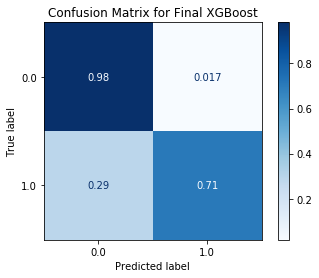

In [8]:
plot_confusion_matrix(xgb_final, 
                      X_test,
                      y_test,
                      cmap= 'Blues', 
                      normalize = 'true')
plt.title('Confusion Matrix for Final XGBoost')

In [9]:
xgb_final.score(X_test, y_test)

0.9445277361319341

# Feature Importance

In [10]:
feature_coef=pd.DataFrame(data=[X_train.columns, xgb_final.feature_importances_]).transpose()

In [11]:
top_five_features=feature_coef.sort_values(by=[1], ascending=False)[:5]
top_five_features

,0,1
10,International plan,0.203274
9,Customer service calls,0.195362
0,Total day charge,0.0837647
7,Voice mail plan,0.0772994
12,Total intl minutes,0.0564935


Text(0.5, 1.0, 'Most Important Features in Model')

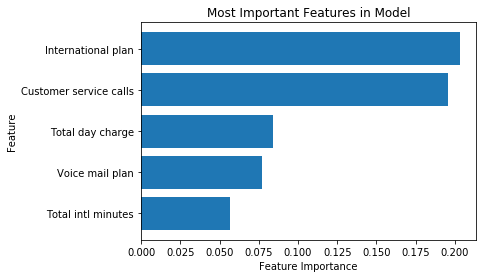

In [12]:
plt.barh(y=top_five_features[0], width = top_five_features[1])

plt.gca().invert_yaxis()
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Most Important Features in Model')

# Distribution

In [31]:
# datasets for churned and unchurned

unchurned = teledf[teledf['Churn']==0.0]
churned = teledf[teledf['Churn']==1.0]

churned.shape, unchurned.shape

((483, 16), (2850, 16))

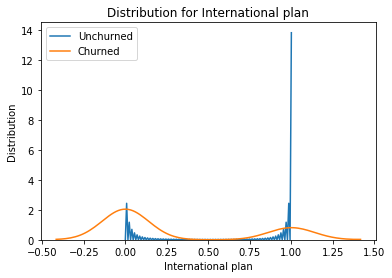

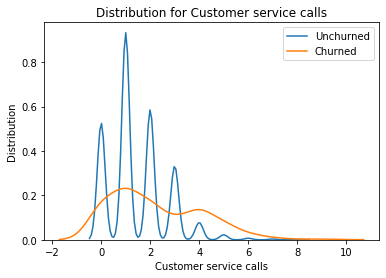

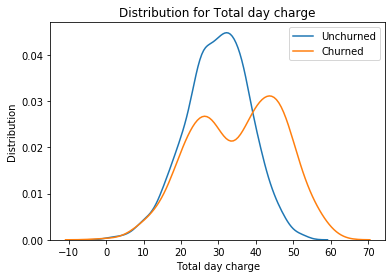

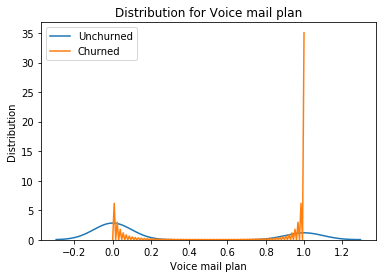

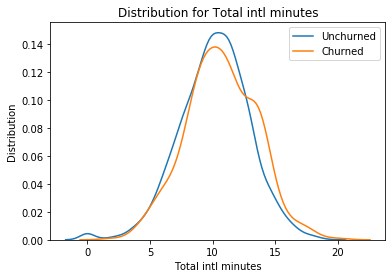

In [43]:
# data overview

for i in top_five_features[0]:
    sns.distplot(unchurned[i], hist = False, label = 'Unchurned')
    sns.distplot(churned[i], hist = False, label = 'Churned')
    plt.xlabel(i)
    plt.ylabel('Distribution')
    plt.title(f'Distribution for {i}')
    plt.show()

In [33]:
for i in top_five_features[0]:
    print(f'{i}:', '\n', 
          f'Churned Mean: {churned[i].mean()}' , '\n',
          f'Unchurned Mean: {unchurned[i].mean()}')

International plan: 
 Churned Mean: 0.2836438923395445 
 Unchurned Mean: 0.06526315789473684
Customer service calls: 
 Churned Mean: 2.229813664596273 
 Unchurned Mean: 1.4498245614035088
Total day charge: 
 Churned Mean: 35.175921325051775 
 Unchurned Mean: 29.780421052631574
Voice mail plan: 
 Churned Mean: 0.16563146997929606 
 Unchurned Mean: 0.29543859649122806
Total intl minutes: 
 Churned Mean: 10.699999999999994 
 Unchurned Mean: 10.158877192982455


Total intl minutes is ultimately an unmeaningful variable. Drop from final presentation.

([<matplotlib.axis.XTick at 0x1a1ff190940>,
 <a list of 2 Text xticklabel objects>)

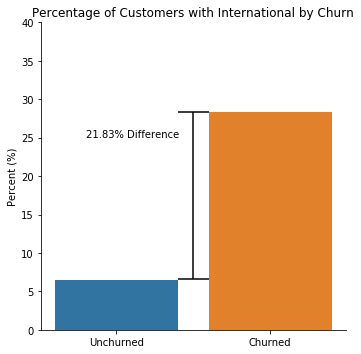

In [98]:
x,y = 'Churn', 'International plan'

percentdf = teledf.groupby(x)[y].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
percentdf[y] = percentdf[y].replace([0.0,1.0],['No','Yes'])
percentdf = percentdf.iloc[[1,3]]

g = sns.catplot(x=x,y='Percent',kind='bar',data=percentdf)
g.ax.set_ylim(0,40)

plt.vlines(ymin=6.6, ymax=28.3, x=0.5)
plt.hlines(xmin=0.4, xmax=0.6, y=28.3)
plt.hlines(xmin=0.4, xmax=0.6, y=6.6)
plt.text(-0.2,25,'21.83% Difference')

plt.title('Percentage of Customers with International by Churn')
plt.ylabel('Percent (%)')
plt.xlabel('')
plt.xticks([0,1],['Unchurned','Churned'])

In [82]:
percentdf

,Churn,International plan,Percent
1,0.0,Yes,6.526316
3,1.0,Yes,28.364389


In [35]:
from scipy.stats import norm

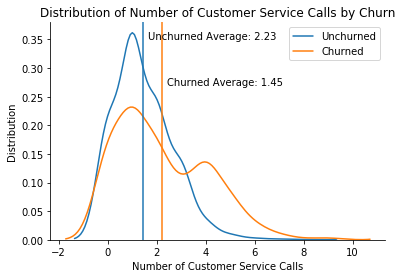

In [106]:
sns.kdeplot(unchurned['Customer service calls'], label='Unchurned', bw = 0.45)
sns.kdeplot(churned['Customer service calls'], label='Churned')

sns.despine()

plt.axvline(x=churned['Customer service calls'].mean(), color='tab:orange')
plt.axvline(x=unchurned['Customer service calls'].mean())
plt.text(churned['Customer service calls'].mean()+0.2,0.27,
         'Churned Average: 1.45')
plt.text(unchurned['Customer service calls'].mean()+0.2,0.35,
         'Unchurned Average: 2.23')

plt.title('Distribution of Number of Customer Service Calls by Churn')
plt.xlabel('Number of Customer Service Calls')
plt.ylabel('Distribution')
plt.show()

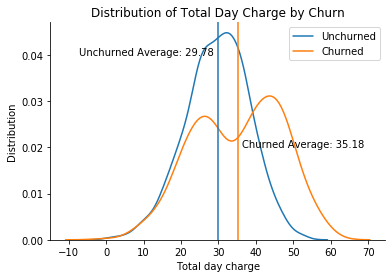

In [112]:
sns.kdeplot(unchurned['Total day charge'], label='Unchurned')
sns.kdeplot(churned['Total day charge'], label='Churned')

sns.despine()

plt.axvline(x=churned['Total day charge'].mean(), color='tab:orange')
plt.axvline(x=unchurned['Total day charge'].mean())
plt.text(churned['Total day charge'].mean()+1,0.02,
         'Churned Average: 35.18')
plt.text(unchurned['Total day charge'].mean()-37,0.04,
         'Unchurned Average: 29.78')

plt.title('Distribution of Total Day Charge by Churn')
plt.xlabel('Total day charge')
plt.ylabel('Distribution')
plt.show()

([<matplotlib.axis.XTick at 0x1a1ff2de0f0>,
 <a list of 2 Text xticklabel objects>)

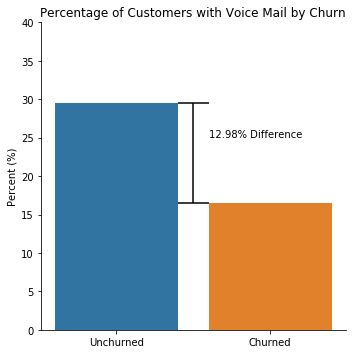

In [102]:
x,y = 'Churn', 'Voice mail plan'

percentdf = teledf.groupby(x)[y].value_counts(normalize=True).mul(100).rename('Percent').reset_index()
percentdf[y] = percentdf[y].replace([0.0,1.0],['No','Yes'])
percentdf = percentdf.iloc[[1,3]]

g = sns.catplot(x=x,y='Percent',kind='bar',data=percentdf)
g.ax.set_ylim(0,40)

plt.vlines(ymin=16.56, ymax=29.54, x=0.5)
plt.hlines(xmin=0.4, xmax=0.6, y=29.54)
plt.hlines(xmin=0.4, xmax=0.6, y=16.56)
plt.text(0.6,25,'12.98% Difference')

plt.title('Percentage of Customers with Voice Mail by Churn')
plt.ylabel('Percent (%)')
plt.xlabel('')
plt.xticks([0,1],['Unchurned','Churned'])

In [79]:
percentdf

,Churn,Voice mail plan,Percent
1,0.0,Yes,29.543860
3,1.0,Yes,16.563147
